# Lab Week 15: FFT review / Convolution

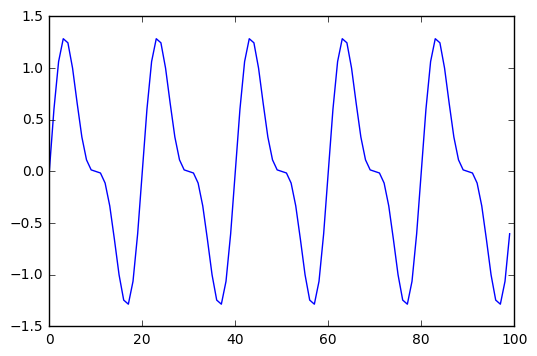

In [2]:
t = np.arange(0, 1, 1/2000)
s = sin(2*pi*100*t) + 0.5 * sin(2*pi*200*t)
plot(s[0:100])

<Container object of 3 artists>

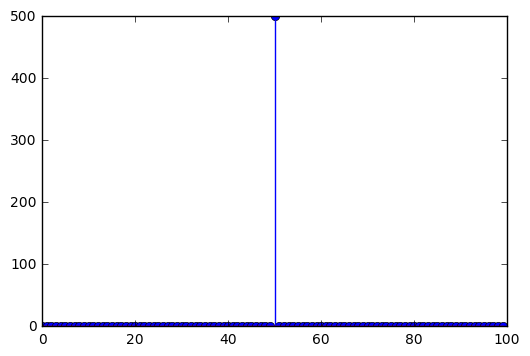

In [3]:
f = fft.fft(s[0:1000])
magS = abs(f)
stem(magS[0:100])

# Part 1: FFT Review #

Use the markdown cell below to answer the following questions. If you're not sure what the answers are, try writing some code, using Python help (`?` followed by the function name), or reviewing the lecture slides. Or ask for help!

A. In the code below, how many elements are in `s`?

`t = np.arange(0, 1, 1/2000)
s = sin(2*pi*100*t) + 0.5 * sin(2*pi*200*t)`

B. In the code below, what is the size of the FFT being taken?

`f = fft.fft(s[0:1000])`

C. How many FFT bins does f have?

D. What frequency corresponds to the first bin (`f[0]`)?

E. What frequency corresponds to the second bin (`f[1]`)?

F. How do you compute the magnitude of bin `f[1]`?

G. What bin corresponds to 100Hz?

H. What bin do you expect to have the highest magnitude?

# Write your answers here...
A. 2000

B. 1000

C. 1000

D. 0Hz

E. 2Hz

F. 
    magS = abs(f)
    mag1 = magS[1]
    
G. f[50]

H. f[50]


# Part 2: Convolution Reverb in Python

In [4]:
# Download the following audio files and store them in the same directory as this lab file:
# http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/noise.wav
# http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/robot.wav
# http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/saw.wav
# http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/sinMandolin1.wav
# http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab14/sinMandolin2.wav
# http://www.doc.gold.ac.uk/~mas01rf/PMC2014-15/IPython/lab13/song1.wav
# http://freemusicarchive.org/music/Jahzzar/Travellers_Guide/Siesta)


noise = wavReadMono("Lab15_data/noise.wav")
robot = wavReadMono("Lab15_data/robot.wav")
saw = wavReadMono("Lab15_data/saw.wav")
sinMandolin1 = wavReadMono("Lab15_data/sinMandolin1.wav")
sinMandolin2 = wavReadMono("Lab15_data/sinMandolin2.wav")
song1 = wavReadMono("Lab15_data/song1.wav")

# get impulse responses pack: http://www.voxengo.com/impulses/

In [5]:
#example:
myReverb = wavReadMono("IMreverbs/ParkingGarage.wav")
play(myReverb)

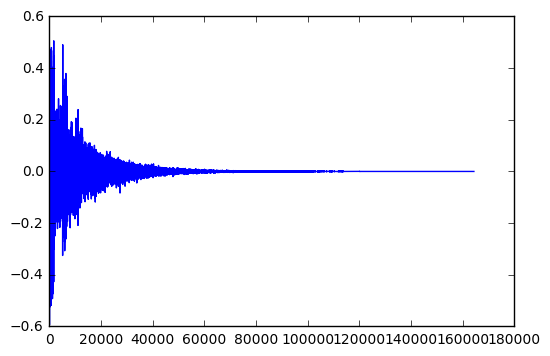

In [6]:
plot(myReverb)

In [7]:
#convolve the reverb and the robot
reverb_robot = convolve(myReverb, robot) 
#normalize: divide by the maximum absolute value in the signal
reverb_robot_normalised = reverb_robot / (max(abs(reverb_robot))) 
play(reverb_robot_normalised)

In [8]:
#example:
myReverbExp = wavReadMono("IMreverbs/Greek7EchoHall.wav")
play(myReverbExp)

In [9]:
#convolve the reverb and the robot
reverb_robot2 = convolve(myReverbExp, robot) 
#normalize: divide by the maximum absolute value in the signal
reverb_robot_normalised2 = reverb_robot2 / (max(abs(reverb_robot2))) 
play(reverb_robot_normalised2)

# Part 3: Using Convolution for Other Effects

In [10]:
h1 = [0.5, 0.5]
h2 = [1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10]

In [11]:
h_eleg = ones(10)
h_eleg /= 10.
h_eleg[3]

0.10000000000000001

In [12]:
song1_h1 = convolve(song1, h1)
song1_h2 = convolve(song1, h2)
noise_h1 = convolve(noise, h1)
noise_h2 = convolve(noise, h2)

In [13]:
# Plot the first 100 samples of song1, song1_h1, and song1_h2.

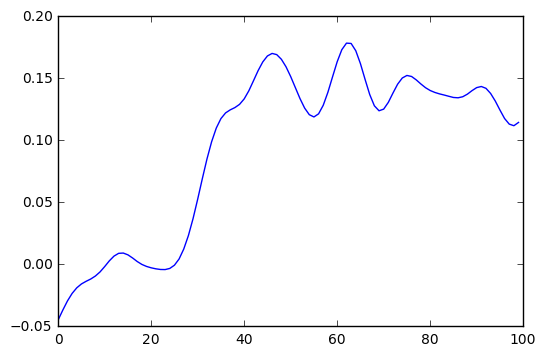

In [14]:
play(song1)
plot(song1[0:100])

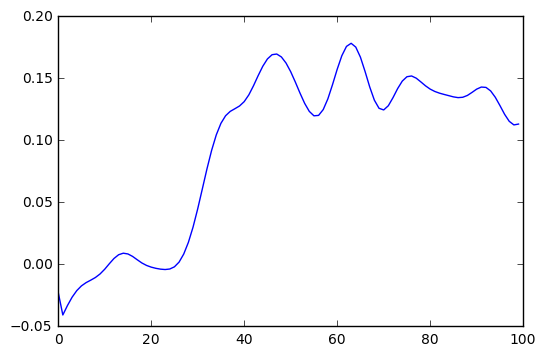

In [15]:
play(song1_h1)
plot(song1_h1[0:100])

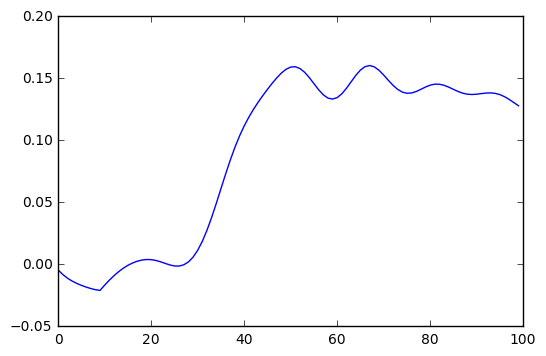

In [16]:
play(song1_h2)
plot(song1_h2[0:100])

In [17]:
# How do the above compare?

#A: The convolution kernel acts as a low-pass filter 
#-> this is the same as we found for blur kernels in image convolution

In [18]:
# And then noise...

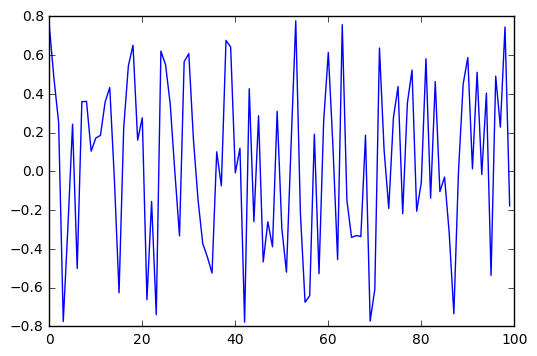

In [19]:
play(noise)
plot(noise[0:100])

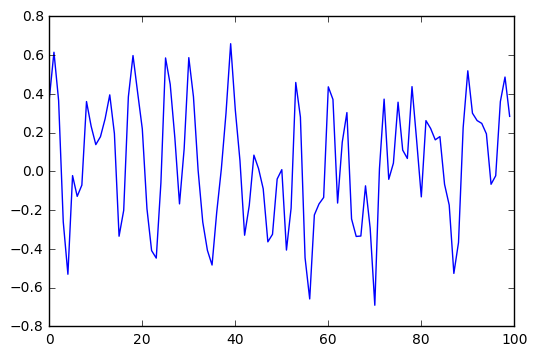

In [20]:
play(noise_h1)
plot(noise_h1[0:100])

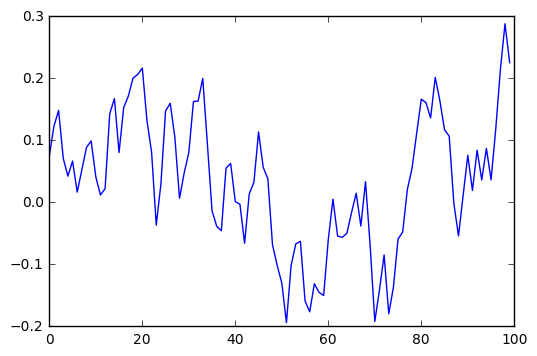

In [21]:
play(noise_h2)
plot(noise_h2[0:100])

In [22]:
# How do the above compare?

#A: Again the noise has increasingly lost higher frequencies, producing a low pass effect

In [23]:
#Plot and compare the spectra:

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


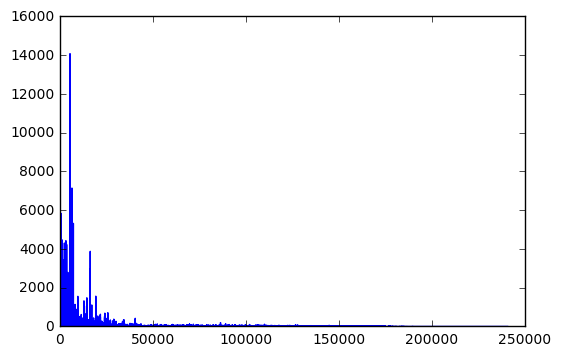

In [45]:
specS1 = abs(fft.fft(song1))
plot(specS1[0:size(specS1)/2])

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


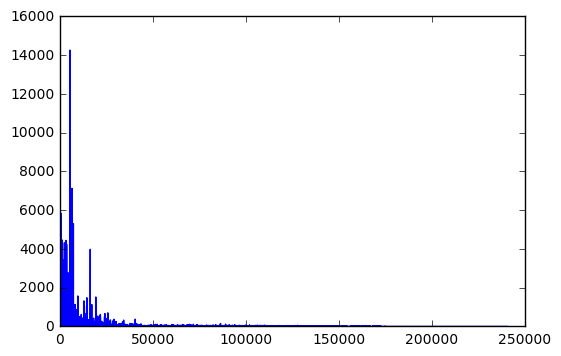

In [44]:
specS1h1 = abs(fft.fft(song1_h1))
plot(specS1h1[0:size(specS1h1)/2])

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


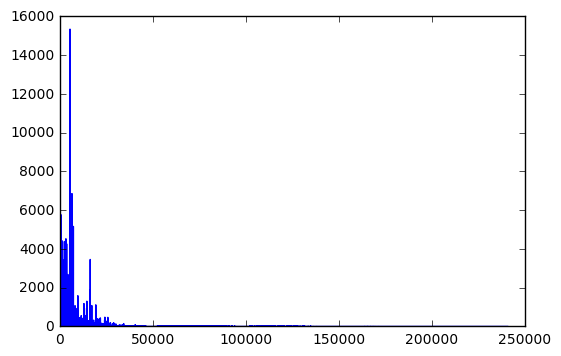

In [43]:
specS1h2 = abs(fft.fft(song1_h2))
plot(specS1h2[0:size(specS1h2)/2])

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


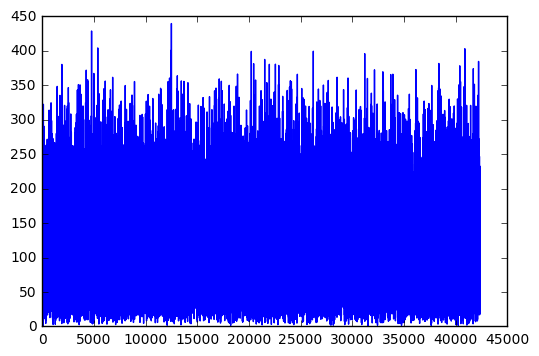

In [42]:
specN = abs(fft.fft(noise))
plot(specN[0:size(specN)/2])

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


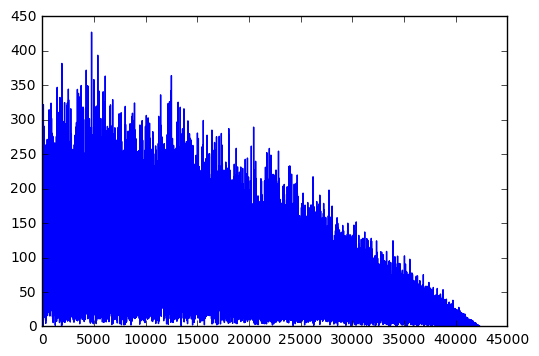

In [41]:
specN1 = abs(fft.fft(noise_h1))
plot(specN1[0:size(specN1)/2])

/Users/pesa/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


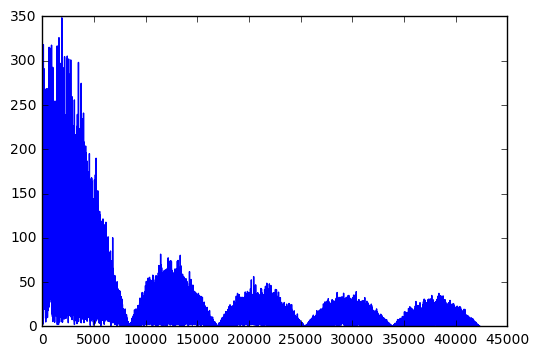

In [40]:
specN2 = abs(fft.fft(noise_h2))
plot(specN2[0:size(specN2)/2])